In [77]:
import networkx as nx
import random
import numpy as np
import math 
from copy import deepcopy
import matplotlib.pyplot as plt

def get_one_network_result(N, round_num, neighbors_num, q, threshold_mode):

    def f(nodes_set):   
        nonlocal all_nodes_set
        nonlocal revolt_nodes_record
        nonlocal time
        nonlocal neighbors
        nonlocal thresholds
    
        revolt_nodes = set()
        
        if (nodes_set == all_nodes_set) and (time >= 2):
            for n in revolt_nodes_record[time-2]:
                revolt_nodes.add(n)

        for n in nodes_set:
            if n not in revolt_nodes:
                if nodes_set.issubset(neighbors[n-1]):
                    if len(nodes_set) >= thresholds[n-1]:
                        revolt_nodes.add(n)
                else:
                    if len(g((nodes_set & neighbors[n-1]))) >= thresholds[n-1]:
                        revolt_nodes.add(n)
                    
        return revolt_nodes
    
    def g(nodes_set):
        if len(nodes_set) == 1:
            return nodes_set
        else: 
            return f(nodes_set)

    # == 隨機產生 network (adjacent list) ==
    all_nodes_set = set(range(1, N+1))
    
    neighbors = []   
    for i in range(1, N+1):
        selected = set()
        for n in range(neighbors_num):
            if random.uniform(0, 1) <= q: # with prob. q: a neighbor is selected randomly from a person to the left
                left = set(range(1, i))
                if len(left-selected) > 0:
                    selected.add(*random.sample(list(left-selected), 1))
            else: # with prob. 1-q: a neighbor is selected randomly from the entire population
                selected.add(*random.sample(list(all_nodes_set-selected-{i}), 1))
        neighbors.append({i, *selected})
    neighbors_at_t1 = deepcopy(neighbors)

    thresholds = []
    if threshold_mode == 1:
        for i in range(1, N+1, 2):
            thresholds.append(int(i/2)+1)
            thresholds.append(int(i/2)+1)
    elif threshold_mode == 2:
        for i in range(1, N+1, 2):
            thresholds.append(int(i/2)+1)
            thresholds.append(int(i/2)+1)
        thresholds[0], thresholds[1] = 2, 2
        # print(all_nodes_set, neighbors, thresholds)
    
    # == 開始找出各個時間點(t)誰會revolt ==
    time = 1
    revolt_nodes_num = []
    revolt_nodes_record = []
    for i in range(round_num):
        if time != 1:
            # 讓自己所有 neighbor 的 neighbors，成為自己的 neighbor
            for i in range(1, N+1):
                for n in neighbors[i-1]:
                    if n != i:            
                        neighbors[i-1] = (neighbors[i-1] | neighbors_at_t1[n-1])
        revolt_nodes = g(all_nodes_set) 
        
        revolt_nodes_num.append(len(revolt_nodes))
        revolt_nodes_record.append(revolt_nodes)

        time += 1

    revolt_nodes_record = [list(s) for s in revolt_nodes_record]
    return revolt_nodes_num, revolt_nodes_record

# Part 3.

In [87]:
# set parameters
random.seed(6)
N = 30
neighbors_num = 2
round_num = 5
network_num = 200
threshold_mode = 1
q = 1

records = []

for network in range(network_num):
    # print(network+1)
    revolt_nodes_num, revolt_nodes_record = get_one_network_result(N, round_num, neighbors_num, q, threshold_mode)
    records.append(revolt_nodes_num)

## FIG. 13.

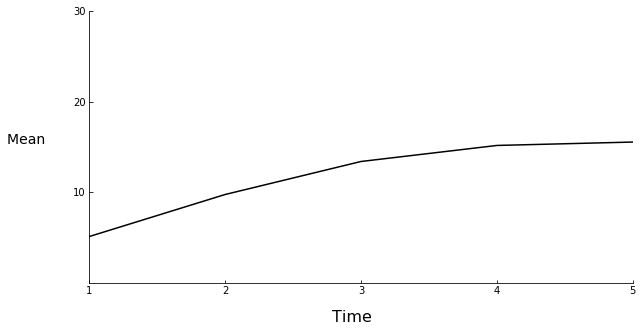

In [89]:
data = np.matrix(records)
mean = np.array(np.mean(data, axis=0)).flatten()
sd = np.array(np.std(data, axis=0)).flatten()
x = list(range(1, round_num+1))

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ratio = 0.5

ax1.plot(x, mean, color='black')
ax2.plot(x, sd, color='black')

ax1.tick_params(direction="in")
ax1.set_ylim(0, 30)
ax1.set_yticks(np.array([10, 20, 30]))
ax1.set_xlim(1, 5)
ax1.set_xticks(np.array([1, 2, 3, 4, 5]))
xleft, xright = ax1.get_xlim()
ybottom, ytop = ax1.get_ylim()
ax1.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel("Mean                   ", rotation=0, y=0.5, fontsize=14)

plt.suptitle("Time", y=0.05, fontsize=16)
plt.show()

In [90]:
records

[[5, 11, 12, 13, 13],
 [6, 11, 13, 13, 13],
 [5, 10, 14, 20, 20],
 [5, 12, 16, 17, 17],
 [5, 9, 14, 17, 17],
 [6, 10, 13, 15, 15],
 [6, 8, 10, 10, 10],
 [5, 11, 17, 19, 20],
 [6, 9, 11, 11, 11],
 [6, 11, 12, 14, 14],
 [5, 12, 13, 20, 20],
 [5, 9, 10, 10, 10],
 [4, 9, 11, 12, 12],
 [6, 7, 10, 11, 11],
 [4, 10, 14, 17, 18],
 [5, 11, 14, 16, 16],
 [5, 9, 9, 9, 9],
 [5, 10, 13, 15, 15],
 [4, 9, 17, 20, 21],
 [6, 11, 15, 20, 21],
 [6, 12, 17, 24, 24],
 [5, 10, 17, 17, 17],
 [5, 10, 14, 16, 16],
 [5, 7, 9, 10, 10],
 [4, 10, 16, 23, 23],
 [4, 10, 12, 12, 12],
 [6, 11, 14, 15, 15],
 [6, 10, 11, 11, 11],
 [5, 10, 17, 18, 20],
 [6, 10, 13, 14, 14],
 [6, 9, 14, 16, 19],
 [5, 10, 14, 15, 15],
 [5, 9, 16, 17, 17],
 [6, 7, 8, 8, 8],
 [5, 9, 15, 17, 17],
 [6, 8, 12, 14, 16],
 [5, 9, 10, 12, 12],
 [6, 9, 9, 9, 9],
 [5, 7, 8, 8, 8],
 [5, 11, 15, 15, 15],
 [4, 10, 14, 14, 16],
 [5, 12, 14, 15, 15],
 [5, 9, 15, 15, 15],
 [5, 12, 16, 16, 16],
 [6, 9, 17, 19, 19],
 [5, 12, 18, 19, 19],
 [6, 10, 16, 22, 22]